# **Trabajo práctico 1**
**Método de la potencia**
---------
**1er cuatrimestre 2023 - Álgebra Lineal computacional**


Grupo "Quiénes son?"

Integrantes:
*   Dafne Yudcovsky (dafneyudcovsky@gmail.com)
*   Guadalupe Maldonado (guada.rocio@gmail.com)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1
Desarrollar un programa que dada una una matriz $A ∈ R^{n · n}$ y un entero positivo $k$, realice $k$ iteraciones del método de la potencia con un vector aleatorio inicial $v ∈ R^{n}$. El programa debe devolver un vector $a ∈ R^{k}$ donde $a_{i}$ sea la proximación al autovalor obtenida en el paso $i$.

In [ ]:
def normalizar(v):
  #Devuelve el vector v normalizado
  norm = np.linalg.norm(v)
  if norm == 0:
    return v
  else:
    return v / norm

def avanzar_v (A, v):
  res = A@v
  res = normalizar(res)
  return res

def rayleigh (A, v):
  return (v@(A@v)) / (v@v) 

def aproximar_autovalor_k(A, k):
  #generar v
  v = np.random.rand(len(A))
  v = normalizar(v)

  #generar el out
  vector_a = np.zeros(k)
 
  for i in range(k):
      v = avanzar_v(A,v)
      vector_a[i] = rayleigh(A,v)
  return vector_a

### Ejercicio 2
Se quiere probar el método con distintos tipos de matrices. Para ello, implementar una función que genere las siguientes 4 matrices A, B, C y D, que tenga como parámetro de entrada el tamaño de las matrices. Los elementos de cada matriz se definen según:

*   **matriz A:** Los elementos $a_{ij}$ son tomados al azar utilizando la función $random()$ de la librería $numpy$ de Python.
*   **matriz B:** Los elementos $b_{ij}$ son tomados al azar utilizando la función $random()$ de la librería $numpy$ de Python y además se cumple que $b_{ij} = b_{ji}$.
*   **matriz C:** Los elementos $c_{ij} = b_{ij}$ si $i ̸= j$ y $c_{ij} = (b_{ij} + 100)$ si $i = j$.
*   **matriz D:** Los elementos $d_{ij} = b_{ij}$ si $i ̸= j$ y $d_{ij} = (b_{ij} + 1000)$ si $i = j$.

En este ejercicio trabajamos con A, B, C y D ∈ $R^{100·100}$



In [ ]:
def generarMatrices(n):
  #funciona solo en matrices cuadradas

  #generar A
  A = np.random.rand(n,n)

  #generar B
  B = np.random.rand(n,n)
  ib = 0
  while(ib<n): 
    jb = ib
    while(jb<n):
      B[jb][ib] = B[ib][jb]
      jb+=1
    ib+=1

  #generar C
  C = np.copy(B)
  ic = 0
  while(ic<n): 
    C[ic][ic] = B[ic][ic]+100
    ic+=1

  #generar D
  D = np.copy(B)
  id = 0
  while(id<n): 
    D[id][id] = B[id][id]+1000
    id+=1
  
  return(A, B, C, D)

**(a)** Se pide realizar 100 iteraciones con el método de la potencia y graficar, en cada caso, el valor de la aproximación al autovalor en el paso $i$ en función del número de iteraciones.

Aproximación de matriz A


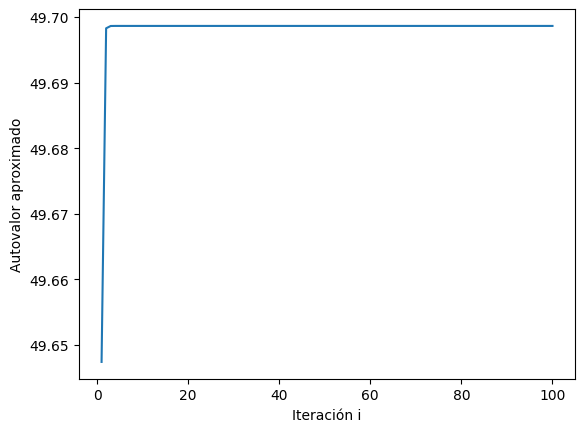


Aproximación de matriz B


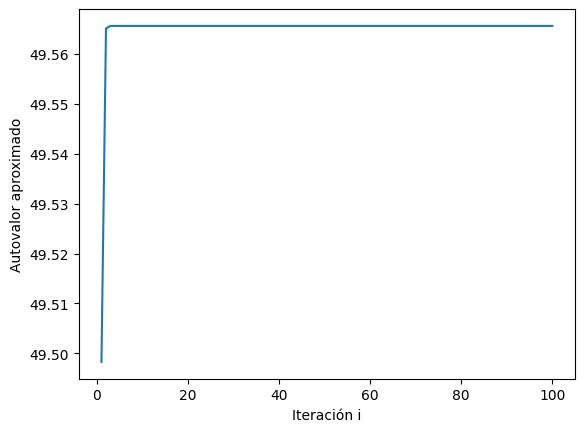


Aproximación de matriz C


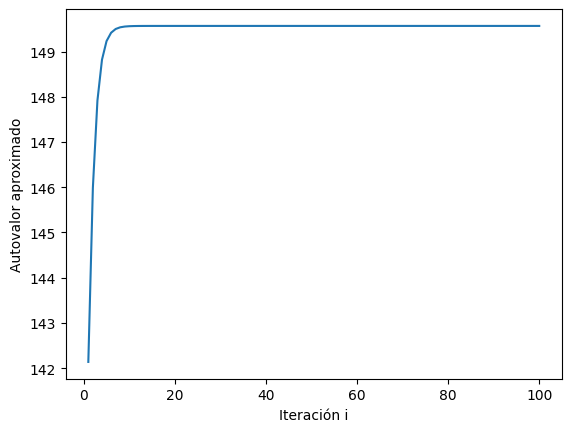


Aproximación de matriz D


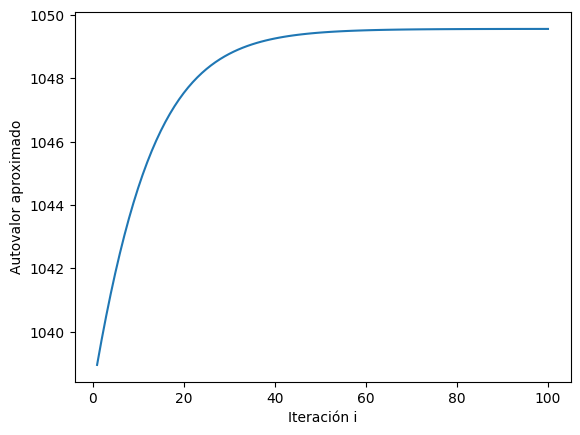

In [ ]:
#Generamos las matrices para este ejercicio
ABCD = generarMatrices(100) 
A = ABCD[0]
B = ABCD[1]
C = ABCD[2]
D = ABCD[3]

def aproximar_y_graficar_autovalor(A):
  #Esta función toma una de las matrices generadas, aproxima su autovalor con el método, y luego genera e imprime el gráfico correspondiente
  
  #generar v
  columnasA = len(A[0])
  v = np.random.rand(columnasA,1)
  
  #eje x:
  x = np.arange(1, 101, 1)
  
  #Uso el método de la potencia (ver ej 1). Guardo los valores en el array y
  y = aproximar_autovalor_k(A, 100)

  #armar el grafico
  plt.plot(x, y)
  plt.xlabel('Iteración i')
  plt.ylabel('Autovalor aproximado')

  plt.show()

#Impresión de los gráficos
print('Aproximación de matriz A')
aproximar_y_graficar_autovalor(A)

print()
print('Aproximación de matriz B')
aproximar_y_graficar_autovalor(B)

print()
print('Aproximación de matriz C')
aproximar_y_graficar_autovalor(C)

print()
print('Aproximación de matriz D')
aproximar_y_graficar_autovalor(D)

**(b)** ¿Qué puede concluir al comparar los gráficos de las distintas matrices?


> **RTA:** Mientras más altos son los valores en las diagonales de las matrices, mayor cantidad de iteraciones se necesitan para estimar el autovalor, y ese autovalor tiene módulo mayor. Esto lo podemos visualizar cuando comparamos las matrices B, C y D, debido a que las últimas dos son modificaciones de la primera.

> Comparando A y B, sin embargo, notamos que el hecho de que los valores en B estén "espejados" ($b_{ij} = b_{ji}$) no hace que se necesiten menos iteraciones para estimar el autovalor: ambos gráficos convergen muy rápido. No necesitan tantas iteraciones para estimar el valor. 

**(c)** ¿Consideran que el método converge rápidamente?

> **RTA:** Sí. Para las matrices A, B, y C, el método nos permitió, en menos de 100 iteraciones, ver que el gráfico crece asintoticamente, es decir, que el método converge y que nuestra estimación del autovalor es certera. 

> Como nos quedaban algunas dudas sobre D, reintentamos su estimación con $i=1000$ iteraciones (ver función `aproximar_y_graficar_autovalor1000`). Este gráfico nos demostró que con alrededor de 200 iteraciones alcanza para lograr una estimación satisfactoria. 

> Considerando que tratamos con matrices que ∈ $R^{100·100}$, estos números son muy buenos. 

Aproximación de matriz D (1000 iteraciones)


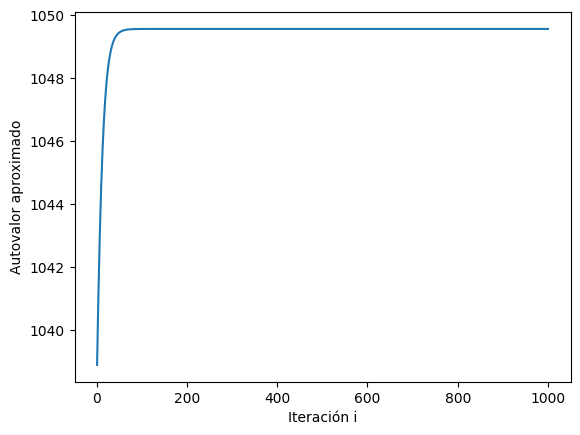

In [ ]:
def aproximar_y_graficar_autovalor1000(A):
  #Esta función es igual al aproximar_y_graficar_autovalor, pero con 1000 iteraciones en lugar de 100. 
  
  #generar v
  columnasA = len(A[0])
  v = np.random.rand(columnasA,1)
  
  #eje x:
  x = np.arange(1, 1001, 1)
  
  #aplico método de la potencia, pero con k=1000
  y= aproximar_autovalor_k(A, 1000)

  #armar el grafico
  plt.plot(x, y)
  plt.xlabel('Iteración i')
  plt.ylabel('Autovalor aproximado')

  plt.show()

print('Aproximación de matriz D (1000 iteraciones)')
aproximar_y_graficar_autovalor1000(D)  

## Ejercicio 3
Está probado que la velocidad de convergencia del método está dada por la relación entre el segundo autovalor de mayor módulo y el primer autovalor de mayor módulo.

Más precisamente, el error en cada paso se multiplica aproximadamente por $(λ2/λ1)^{2}$.

Si se define el vector de errores $e ∈ R^{100·100}$, tal que sus elementos se calculan como:
> $e_{i} = |λ_{max} − a_{i}|$

donde $λ_{max}$ es el autovalor de mayor módulo de A, y $a_{i}$ es la aproximación del autovalor en la iteración $i$ (ver ejercicio 1):




**(a)** Graficar los errores $log(e_{i})$ en función del número de iteración para los casos de las matrices A, B, C y D del ejercicio 2.

Error de aproximación de matriz A


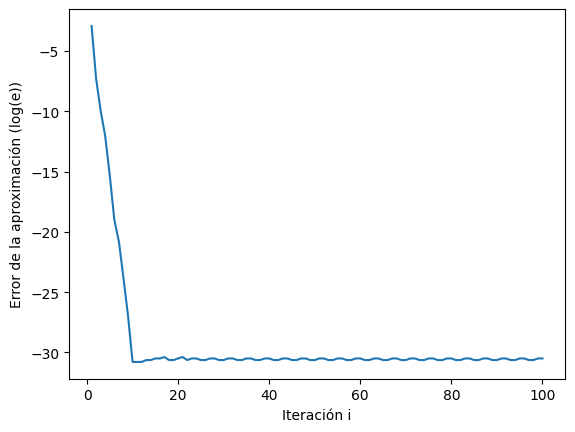

None

Error de aproximación de matriz B


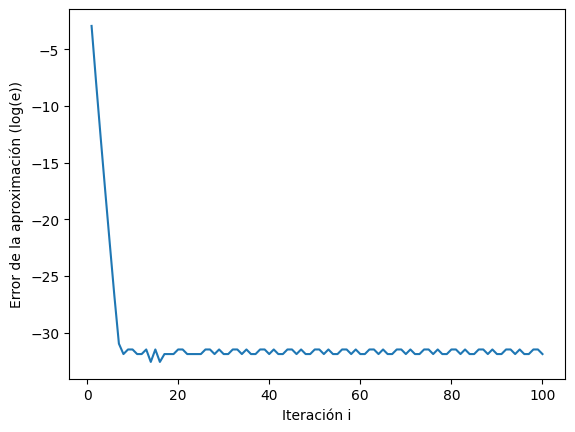

None

Error de aproximación de matriz C


<ipython-input-14-615aeb3c5741>:37: RuntimeWarning: divide by zero encountered in log
  y[i] = np.log(e[i])


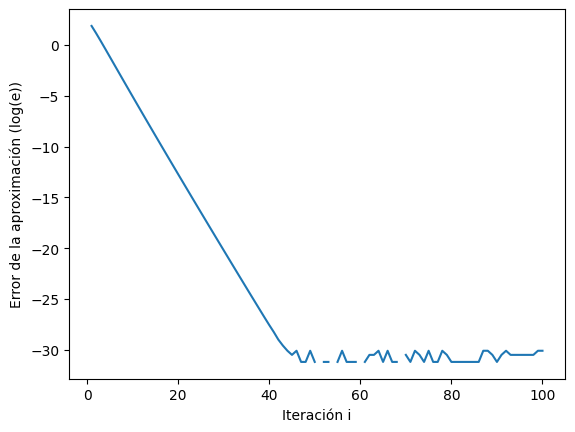

None

Error de aproximación de matriz D


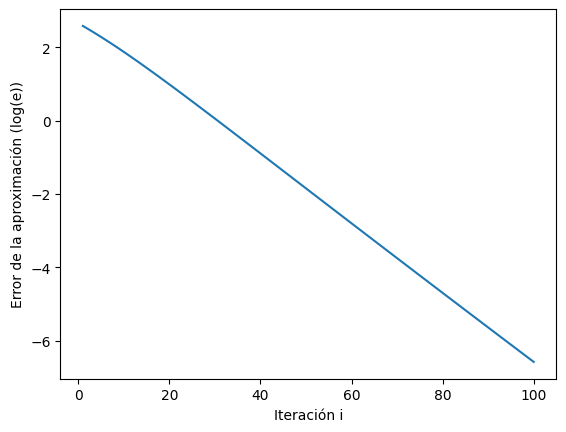

None


In [ ]:
def hallar_autovalor_max(A):
  #esta función nos devuelve el valor absoluto maximo entre los autovalores
  autovals, autovecs = np.linalg.eig(A)

  #creamos otro array con todos los autovalores, pero sin signo
  abs_autovals = autovals
  i = 0
  while (i < len(abs_autovals)):
    abs_autovals[i] = np.absolute(autovals[i]) 
    i += 1
  
  np.sort(abs_autovals)

  return abs_autovals[0]

def graficar_errores(A, k):
#k es el número de iteraciones

  #eje x:
  x = np.arange(1, k+1, 1)
  
  #hallo el max autovalor
  autoval_max = hallar_autovalor_max(A)
  
  #ahora generamos e, el array con todos los errores por iteracion
  a = aproximar_autovalor_k(A, k)
  e = np.zeros(k) #misma dimension que x
  j = 0
  while (j < len(a)):
    e[j] = np.absolute(autoval_max - a[j])
    j += 1

  #armamos eje y para el grafico
  y = np.copy(e)
  i = 0
  while (i < len(y)):
    y[i] = np.log(e[i])
    i += 1

  #graficamos
  plt.plot(x, y)
  plt.xlabel('Iteración i')
  plt.ylabel('Error de la aproximación (log(e))')

  plt.show()

#Impresión de los gráficos
print('Error de aproximación de matriz A')
print(graficar_errores(A, 100))

print()
print('Error de aproximación de matriz B')
print(graficar_errores(B, 100))

print()
print('Error de aproximación de matriz C')
print(graficar_errores(C, 100))

print()
print('Error de aproximación de matriz D')
print(graficar_errores(D, 100))


**(b)** Sabiendo que el factor por el que se multiplica el error es aproximadamente $(λ_{2}/λ_{1})^{2}$, la pendiente de la recta obtenida debería ser aproximadamente $2 · log(λ_{2}/λ_{1})$.
Para
Para comparar los valores obtenidos experimentalmente, en el mismo gráfico representar $log(e_{i})$ del ítem (a) y la función $y(x) = 2 · log(λ_{2}/λ_{1}) · x + log(e_{0})$.

Error de aproximación de matriz A vs función y(x)


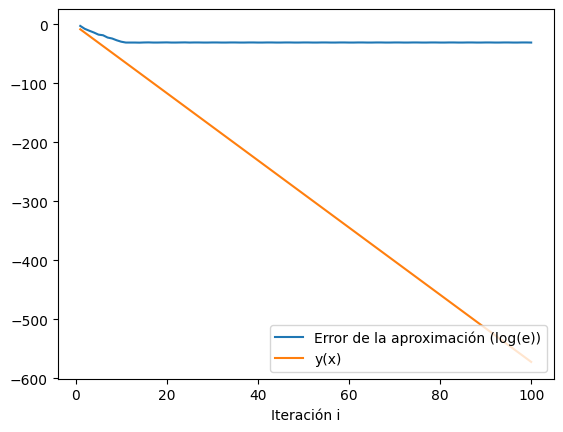

None

Error de aproximación de matriz B vs función y(x)


<ipython-input-17-5e60c0e53e32>:38: RuntimeWarning: divide by zero encountered in log
  error[i] = np.log(e[i])


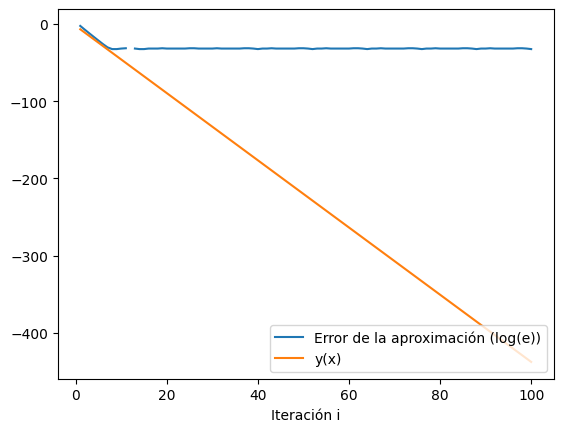

None

Error de aproximación de matriz C vs función y(x)


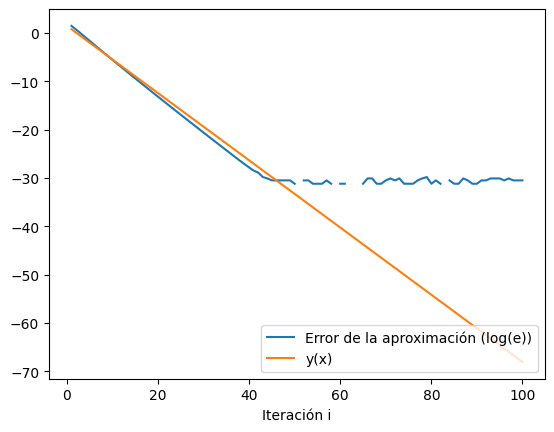

None

Error de aproximación de matriz D vs función y(x)


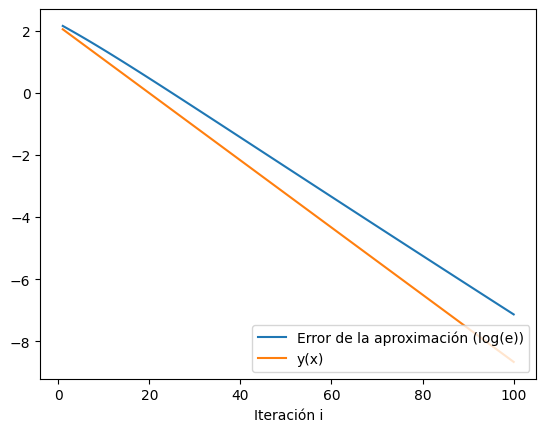

None


In [ ]:
def hallar_autovalores_dos(A):
  #esta función nos devuelve los dos autovalores con mayor valor absoluto
  
  autovals, autovecs = np.linalg.eig (A)

  abs_autovals = autovals

  i = 0
  while (i < len(abs_autovals)):
    abs_autovals[i] = np.absolute(autovals[i]) 
    i += 1
  
  np.sort(abs_autovals)

  return (abs_autovals[0], abs_autovals[1])

def graficar_error_comparando(A, k):
  #k es el número de iteraciones

  #eje x:
  x = np.arange(1, k+1, 1)
  
  #generar los autovalores (ya están en su valor absoluto)
  autoval_uno = hallar_autovalores_dos(A)[0]
  autoval_dos = hallar_autovalores_dos(A)[1]
  
  #ahora generamos e
  e = aproximar_autovalor_k(A, k)
  j = 0
  while (j < len(e)):
    e[j] = np.absolute(autoval_uno - e[j])
    j += 1

  #armamos eje y para el grafico
  error = e
  i = 0
  while (i < len(error)):
    error[i] = np.log(e[i])
    i += 1
  
  recta = 2 * np.log(np.divide(autoval_dos, autoval_uno)) * x + error[0]

  #graficamos
  plt.plot(x, error, label = 'Error de la aproximación (log(e))')
  plt.plot(x, recta, label = 'y(x)')
  plt.legend(loc='lower right')
  plt.xlabel('Iteración i')

  plt.show()

#Impresión de los gráficos
print('Error de aproximación de matriz A vs función y(x)')
print(graficar_error_comparando(A, 100))

print()
print('Error de aproximación de matriz B vs función y(x)')
print(graficar_error_comparando(B, 100))

print()
print('Error de aproximación de matriz C vs función y(x)')
print(graficar_error_comparando(C, 100))

print()
print('Error de aproximación de matriz D vs función y(x)')
print(graficar_error_comparando(D, 100))

**(c)** ¿Qué pueden concluir a partir de los gráficos anteriores respecto a cada uno de los distintos tipos de matrices que analizaron?

> **RTA:** El error es evidentemente más significativo en las matrices C y D que en B. Si se miran los gráficos del ejercicio 3a, C y D tienen valores del eje $y$ más grandes que B. Esto concuerda con los gráficos de las aproximaciones del ejercicio 2. Además, igual que como notamos antes, la diferencia entre A y B es pequeña: la condición de $b_{ij} = b_{ji}$ no mejora significativamente la precisión del método. 

> Podemos visualizar que el error queda acotado pero no converge, sino que oscila.  En línea con lo que venimos viendo, A y B tienen oscilaciones similares y pequeñas, mientras que C tiene oscilaciones más drásticas. El gráfico de la matriz D no queda acotado (se asemeja a una recta) porque necesita más iteraciones para que comience a oscilar.

> Mirando los gráficos del ejercicio 3b, la pendiente es más pronunciada para A y B que para C y D. Las matrices con valores diagonales más grandes tienen autovalores $λ_{1}$ y $λ_{2}$ de mayor módulo, por lo que $(λ_{2}/λ_{1})^{2}$ tiene valor más pequeño. Esto se traduce en una recta con pendiente $2 · log(λ_{2}/λ_{1})$ menor. 

> En este trabajo en particular, por ejemplo, la pendiente de la recta en la matriz D es mucho menor que la de la matriz A. Mientras más se aleje la recta de $y(x)$ al eje $x$, menor módulo tienen los autovalores, y más eficiente es el método. 